# Lending Club EDA

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loan_2015 data

In [46]:
df = pd.read_csv('loan_2015.csv') 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (49,70) have mixed types. Specify dtype option on import or set low_memory=False.



In [47]:
cols=df.columns.values

## Find all_null_feature, num_feature, ob_feature

In [48]:
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)
    

In [49]:
print(len(num_feature), len(ob_feature))
print(len(all_null_feature))

74 20
14


In [50]:
all_null_feature

['memberid',
 'secappopenacc',
 'revolbaljoint',
 'secapprevolutil',
 'secappcollections12mthsexmed',
 'secappficorangelow',
 'secappopenactil',
 'secappmortacc',
 'secappinqlast6mths',
 'secappchargeoffwithin12mths',
 'secappmthssincelastmajorderog',
 'secappnumrevaccts',
 'secappearliestcrline',
 'secappficorangehigh']

In [51]:
ob_feature

['term',
 'intrate',
 'homeownership',
 'initialliststatus',
 'revolutil',
 'earliestcrline',
 'emplength',
 'emptitle',
 'desc',
 'grade',
 'zipcode',
 'disbursementmethod',
 'verificationstatusjoint',
 'purpose',
 'applicationtype',
 'subgrade',
 'verificationstatus',
 'addrstate',
 'issued',
 'loanstatus']

In [52]:
for feat in ob_feature:
    print("object feature:",feat)
    print(df[feat].isnull().sum())
    print(len(df[feat].value_counts()))
    print(df[feat].value_counts())

object feature: term
0
2
 36 months    283173
 60 months    137922
Name: term, dtype: int64
object feature: intrate
0
111
  7.89%    20304
  9.17%    20056
 10.99%    19779
  9.99%    19612
 12.29%    18545
 12.69%    18005
  8.18%    17811
 13.99%    17773
 13.33%    17568
 11.53%    16180
 14.65%    13487
 15.61%    12128
 16.55%    10943
 16.99%    10074
 17.57%     9881
 17.86%     9683
  5.32%     9652
  7.26%     9437
  6.24%     7468
  6.89%     7012
 18.25%     6750
 11.99%     5331
 13.67%     4507
 19.99%     4462
 12.59%     4351
 13.18%     4345
 18.55%     4110
  6.92%     4070
 19.19%     3557
 20.99%     3416
           ...  
  8.49%      393
 13.44%      381
 27.31%      347
 14.85%      340
  7.91%      325
 25.80%      309
 25.99%      272
 15.77%      258
 27.88%      222
 25.83%      221
 16.59%      208
 17.27%      175
 25.89%      171
 17.97%      168
  6.00%      146
 28.49%      139
 19.48%      118
 28.99%      112
 19.89%       97
 26.06%       92
 21.48%    

914
945xx    4466
750xx    4404
112xx    4170
300xx    4006
606xx    3945
331xx    3433
070xx    3364
770xx    3351
900xx    3218
100xx    3218
891xx    3103
330xx    3029
117xx    2898
917xx    2805
104xx    2771
852xx    2513
921xx    2509
926xx    2414
481xx    2332
913xx    2301
925xx    2267
334xx    2246
601xx    2229
600xx    2194
604xx    2165
113xx    2129
853xx    2069
802xx    2046
080xx    2038
773xx    2037
         ... 
862xx       1
503xx       1
694xx       1
821xx       1
502xx       1
568xx       1
849xx       1
007xx       1
649xx       1
969xx       1
205xx       1
509xx       1
709xx       1
742xx       1
269xx       1
348xx       1
892xx       1
507xx       1
510xx       1
340xx       1
702xx       1
343xx       1
942xx       1
854xx       1
522xx       1
929xx       1
399xx       1
203xx       1
520xx       1
837xx       1
Name: zipcode, Length: 914, dtype: int64
object feature: disbursementmethod
0
1
Cash    421095
Name: disbursementmethod, dtype: int64
object f

## For an issued loan, fundedamnt=loanamnt, drop fundedamnt

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,fundedamount,loanamount
0,20000.0,20000.0
1,10000.0,10000.0
2,18000.0,18000.0
3,20000.0,20000.0
4,16000.0,16000.0
5,24000.0,24000.0
6,17475.0,17475.0
7,21000.0,21000.0
8,8800.0,8800.0
9,3600.0,3600.0


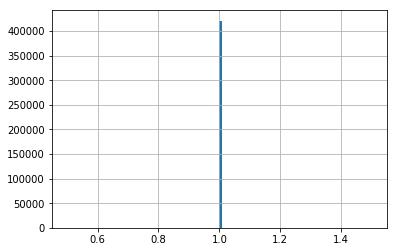

In [53]:
df.ratio=df.fundedamount/df.loanamount.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamount','loanamount']][:10]

##### Histogram

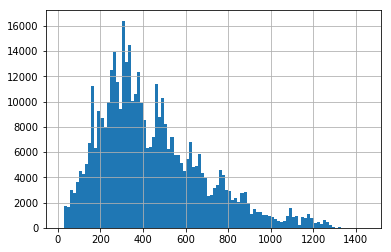

In [54]:
df.installment.hist(bins=100)

##### Meanr response

In [55]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [56]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [57]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
              "grade", "subgrade", "openacc"]
n = len(dummy_list)

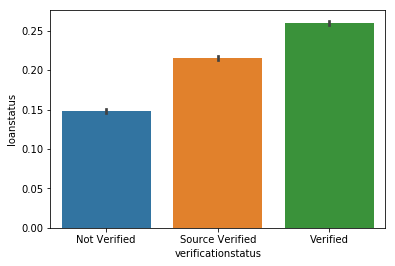

In [58]:
# why verified incomes gives higher default rates?
sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

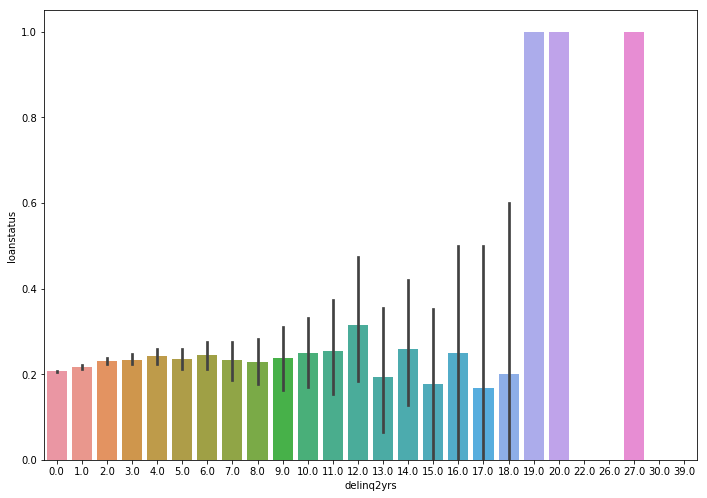

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)

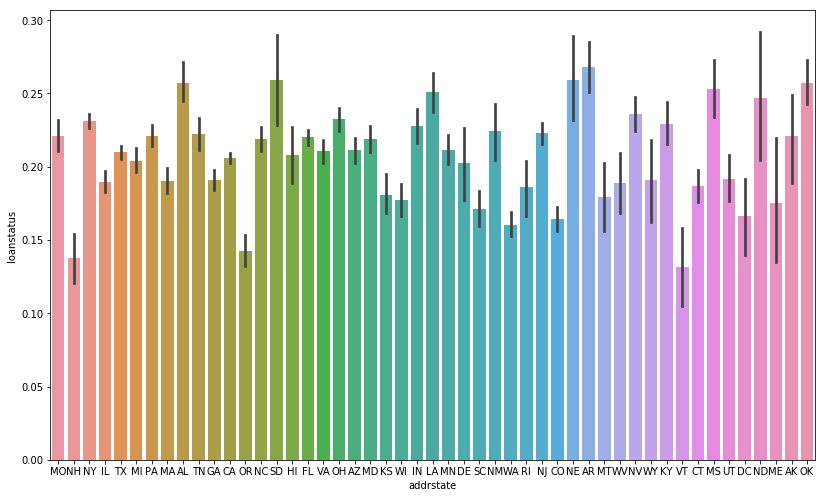

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)

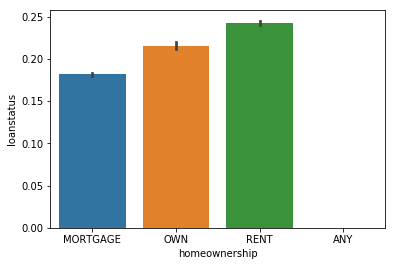

In [61]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)

AttributeError: Unknown property fontsize

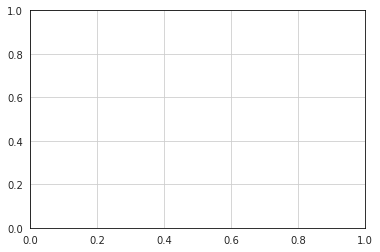

In [111]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [63]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

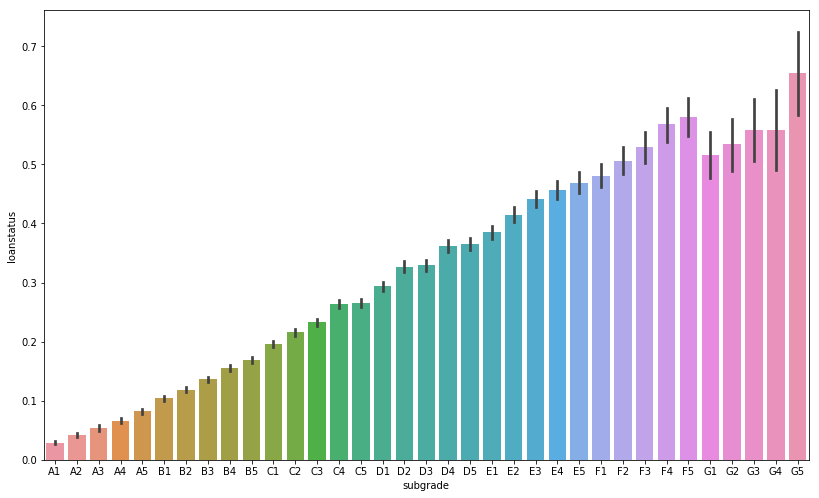

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

In [108]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.iloc[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%', '40%', '60%', '80%', '100%']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    plt.yticks(fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name, fontsize = 20)
    fig.savefig('%s.jpg' % feat_name, dpi = 300)

In [109]:
dummy2 = ['annualinc', 'dti', 'revolbal', 'tothicredlim', 'totalbalexmort','totalbclimit','totalilhighcreditlimit']

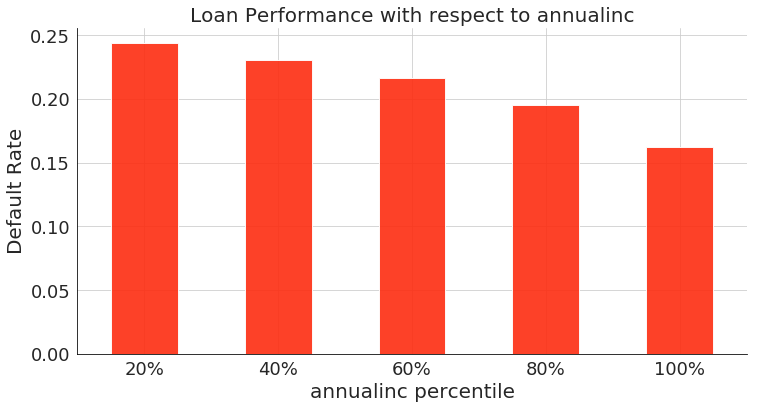

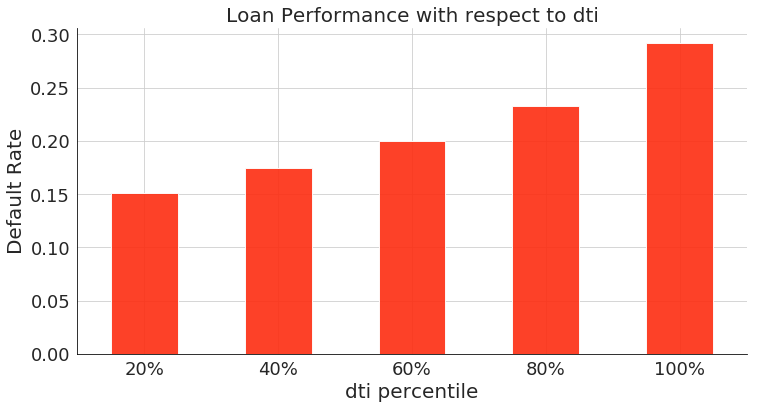

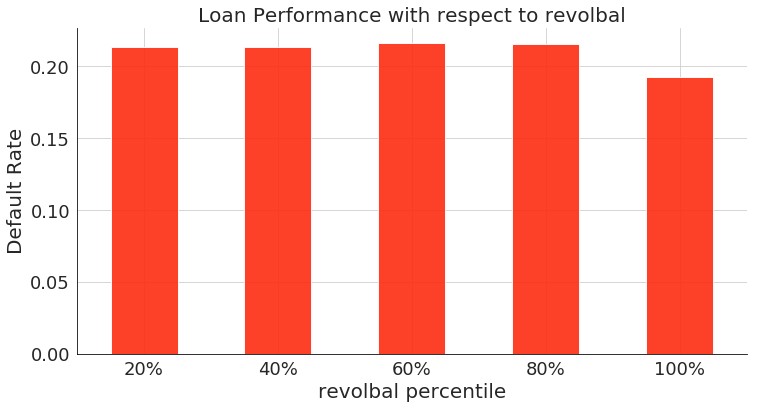

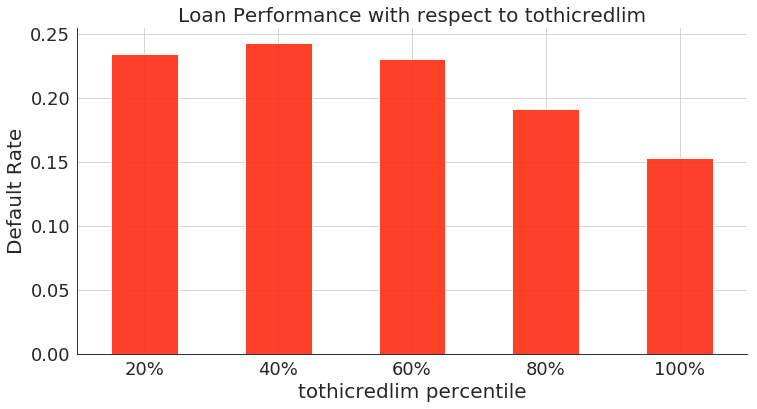

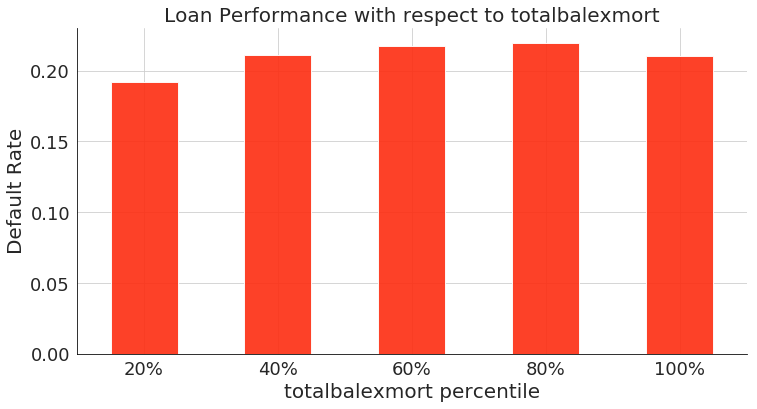

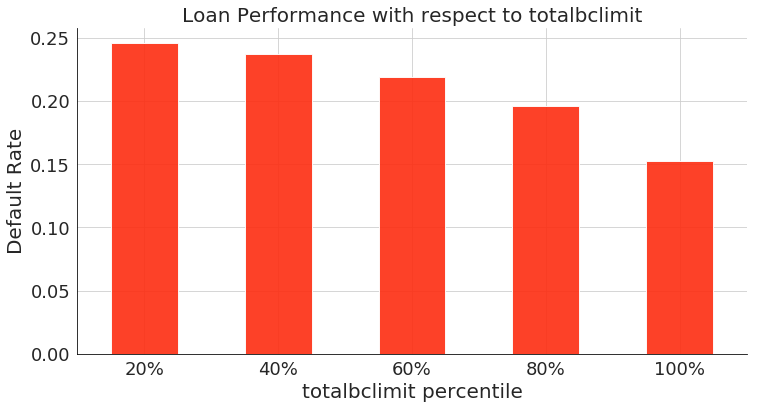

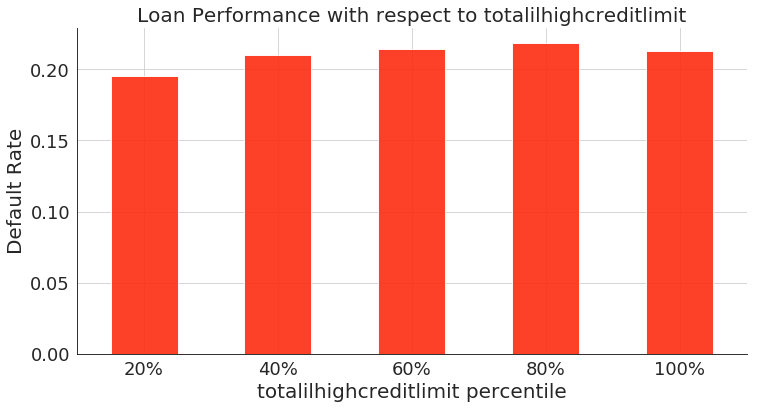

In [110]:
for feat_name in dummy2:
    countinuous_variable_plot(feat_name)

In [97]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='puhanzhang', api_key='DVwix9W1hRIowKPoID1t')

In [98]:
df["loanamount"] = df["loanamount"].astype("float64")

In [99]:
df_global = pd.DataFrame({"fp_pieces" : df.groupby("addrstate")["loanstatus"].value_counts(normalize=True)}).reset_index()
df_global = pd.DataFrame(df.groupby("addrstate")["loanamount"].sum() / 1000000).reset_index()

In [100]:
df_fullp = pd.DataFrame({"fp_pieces" : df.groupby("addrstate")["loanstatus"].value_counts(normalize=True)}).reset_index()

In [101]:
df_global = pd.concat([df_global,df_fullp[df_fullp["loanstatus"] == 0].reset_index()], axis=1)
df_global = pd.concat([df_global,df_fullp[df_fullp["loanstatus"] == 1].reset_index()], axis=1)

In [103]:
df_global.columns = ['addrstate', 'loanamount', 'index', 'addrstate2', 'loanstatus',
       'fp_pieces', 'index2', 'addrstate2', 'loanstatus', 'cf_pieces']
df_global.drop(["addrstate2", "index", "index2", "loanstatus"], axis=1, inplace=True)
df_global["totalcases"] = pd.DataFrame({"loancases" : df.groupby("addrstate")["loanstatus"].count()}).reset_index().loancases
df_global["average"] = df_global["loanamount"]*1000000/df_global["totalcases"]

In [104]:
for column in [column for column in df_global.columns if df_global[column].dtypes == "float64"]:
    df_global[column] = df_global[column].map('{:.2f}'.format).astype(str)
    
df_global["totalcases"].astype("int")
for column in df_global.columns:
    df_global[column] = df_global[column].astype(str)

In [105]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_global['text'] = df_global["addrstate"] + '<br>' +\
    'Total loan amount: '+df_global["loanamount"] + " M USD"+ '<br>'+'Fully paid rate: '+df_global["fp_pieces"]+'<br>'+\
    'Charged off rate: '+df_global["cf_pieces"]+'<br>'+"Total cases number: " + df_global["totalcases"]+'<br>'+\
    'Avg. loan amount: '+df_global["average"] + " USD"

In [106]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_global["addrstate"],
        z = df_global["cf_pieces"].astype(float),
        locationmode = 'USA-states',
        text = df_global['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Charged off rate")
        ) ]
layout = dict(
        title = '2015 Lending Club loans status general information by states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )

In [107]:
init_notebook_mode(connected=True)
py.iplot(fig)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

